<a href="https://colab.research.google.com/github/jennyryao/final_project/blob/main/predict_solar_rooftops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [ ]:
url = "https://raw.githubusercontent.com/jennyryao/PS4HouseDataExercise/master/train.csv"
data = pd.read_csv(url)
data.shape
train = data.iloc[:,:]
train.to_json('housedata.json')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# New Section

In [ ]:
# investigate Sale Price
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

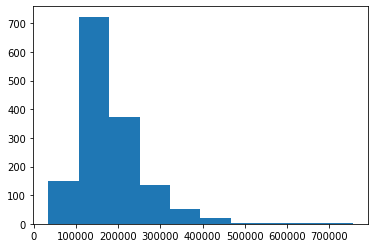

In [ ]:
# plot hist
plt.hist(train['SalePrice'])

In [ ]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(1460, 38)

In [ ]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:5].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [ ]:
# pick out X cols and Y = SalePrice
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageCars,GarageArea
0,7,1710,2,548
1,6,1262,2,460
2,7,1786,2,608
3,7,1717,3,642
4,8,2198,3,836
...,...,...,...,...
1455,6,1647,2,460
1456,6,2073,2,500
1457,7,2340,1,252
1458,5,1078,1,240


In [ ]:
# build Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [ ]:
# How good is the model
model.score(X,Y)


0.7501993255220817

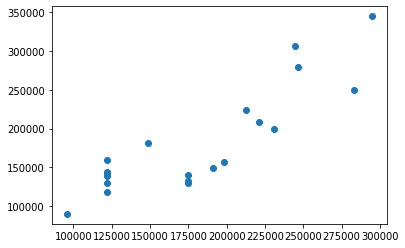

In [ ]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [ ]:
#predict using test data
url = "https://raw.githubusercontent.com/jennyryao/PS4HouseDataExercise/master/test.csv"
data = pd.read_csv(url)
data.shape
test = data.iloc[:,:]
test.to_json('housedata.json')
test.head()




,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml
2,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
3,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
4,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [ ]:
newCols = cols.drop(['SalePrice'])
X2 = test[newCols]
X2

lr = linear_model.LinearRegression()
#model = lr.fit(X2, Y)
testPredictions = model.predict(X2)

In [ ]:
#export results to csv

preLen = len(testPredictions)
preLen
pred_list = testPredictions.tolist()
d = {'Id': test.Id, 'PredSalePrice': pred_list}

testdf = pd.DataFrame(d)
testdf.to_csv(index=False)


SyntaxError: ignored